Lets Visualize the Paitent Image and its Mask

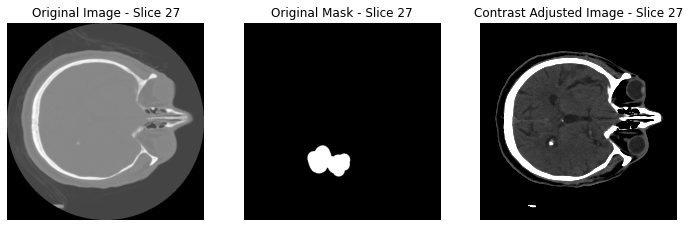

In [48]:
import nibabel as nib
import matplotlib.pyplot as plt

def visualize_slices(image_path, mask_path, slice_number, contrast_min, contrast_max):
    # Load NIfTI files
    image = nib.load(image_path).get_fdata()
    mask = nib.load(mask_path).get_fdata()

    # Ensure the slice number is within the valid range
    slice_number = max(0, min(slice_number, image.shape[2] - 1))

    # Get the specified slices
    image_slice = image[:, :, slice_number]
    mask_slice = mask[:, :, slice_number]

    # Plot the images with and without contrast side by side
    plt.figure(figsize=(12, 5))

    # Plot original image and mask
    plt.subplot(1, 3, 1)
    plt.imshow(image_slice, cmap='gray')
    plt.title('Original Image - Slice {}'.format(slice_number))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask_slice, cmap='gray')
    plt.title('Original Mask - Slice {}'.format(slice_number))
    plt.axis('off')

    # Plot contrast-adjusted image and mask
    plt.subplot(1, 3, 3)
    plt.imshow(image_slice, cmap='gray', vmin=contrast_min, vmax=contrast_max)
    plt.title('Contrast Adjusted Image - Slice {}'.format(slice_number))
    plt.axis('off')

    plt.show()

# Example usage
image_path = 'nifti_files/images/ProxmedImg006.nii.gz'
mask_path = 'nifti_files/labels/ProxmedImg006.nii.gz'
slice_number = 27  # Replace with the desired slice number
contrast_min = -26   # Replace with the desired minimum contrast value
contrast_max = 226  # Replace with the desired maximum contrast value

visualize_slices(image_path, mask_path, slice_number, contrast_min, contrast_max)


Checking the Dimensions of Patient Files (.nii.gz)

In [3]:
import os
import nibabel as nib

def check_dimensions(directory_path):
    # Get a list of all NIfTI files in the directory
    nifti_files = [f for f in os.listdir(directory_path) if f.endswith('.nii.gz')]

    # Loop through each file and print its dimensions
    for file_name in nifti_files:
        file_path = os.path.join(directory_path, file_name)
        try:
            # Load the NIfTI file
            img = nib.load(file_path)

            # Get the dimensions of the image
            dimensions = img.shape

            # Print the dimensions
            print(f"Dimensions of {file_name}: {dimensions}")
        except nib.filebasedimages.ImageFileError as e:
            print(f"Error loading {file_name}: {e}")

# Replace 'your_directory' with the actual path to your directory containing NIfTI files
directory_path = 'brain/images'

# Call the function to check dimensions
check_dimensions(directory_path)


Dimensions of ProxmedImg006_NCCT.nii.gz: (512, 512, 58)
Dimensions of ProxmedImg013_NCCT.nii.gz: (512, 512, 31)
Dimensions of ProxmedImg014_NCCT.nii.gz: (512, 512, 40)
Dimensions of ProxmedImg021_NCCT.nii.gz: (512, 512, 36)
Dimensions of ProxmedImg022_NCCT.nii.gz: (512, 512, 28)
Dimensions of ProxmedImg025_NCCT.nii.gz: (512, 512, 31)
Dimensions of ProxmedImg043_NCCT.nii.gz: (512, 512, 57)


Here You can see we have Same Height and Width For all the nifti files data But there is variations in the Depth i.e., the Number of slices in each case. So to Overcome this we need to make the depths equal for all The cases. (Min).... Below Trying to Make the Depths Equal for each case by performing some operatins on nifti file as shown below

First Converting All NIFTI Files to DICOM Files Manully from 3D Slicer

Now we have Folder Named as dicom_file which contain the series of dicom files of different patients

Now Grouping the Dicom Series for each case to Minimum means to the lowest of all the depths: - <br>
Dimensions of ProxmedImg006_NCCT.nii.gz: (512, 512, 58)<br>
Dimensions of ProxmedImg013_NCCT.nii.gz: (512, 512, 31)<br>
Dimensions of ProxmedImg014_NCCT.nii.gz: (512, 512, 40)<br>
Dimensions of ProxmedImg021_NCCT.nii.gz: (512, 512, 36)<br>
Dimensions of ProxmedImg022_NCCT.nii.gz: (512, 512, 28)<br>
Dimensions of ProxmedImg025_NCCT.nii.gz: (512, 512, 31)<br>
Dimensions of ProxmedImg043_NCCT.nii.gz: (512, 512, 57)<br>

So here we have Minimum depth as **28** which is for patient **022** 
So grouping all the dicome Series Now to 28 Number of slices for each case to the Folder Named Dicom_groups

In [4]:
from glob import glob
import shutil
import os
import dicom2nifti
import nibabel as nib
import numpy as np

In [ ]:
in_path = "dicom_file/images"  #STARTING WITH images
out_path = "dicom_groups/images"
# - /* (evrything)
for patient in glob(in_path + '/*'):
    patient_name = os.path.basename(os.path.normpath(patient))
    number_folders = int(len(glob(patient+'/*'))/28)  #no of slices i need to create as mean taken of dim taken can take min also
    #this code is ok but some what confused
    #move patient slices to dicom images sub
    for i in range(number_folders):
        output_path_name = os.path.join(out_path, patient_name + '_' + str(i))
        print(output_path_name)
        os.mkdir(output_path_name)
        for i, file in enumerate(glob(patient+'/*')):
            if i == 28:  # in soure vi it was 28+1 creating problem adding one more extra img
                break
            shutil.move(file, output_path_name)  #moving to the new file made output path name


In [ ]:
in_path = "dicom_file/labels"  #STARTING WITH LABELS
out_path = "dicom_groups/labels"
# - /* (evrything)
for patient in glob(in_path + '/*'):
    patient_name = os.path.basename(os.path.normpath(patient))
    number_folders = int(len(glob(patient+'/*'))/28)  #no of slices i need to create as mean taken of dim taken can take min also
    #this code is ok but some what confused
    #move patient slices to dicom images sub
    for i in range(number_folders):
        output_path_name = os.path.join(out_path, patient_name + '_' + str(i))
        print(output_path_name)
        os.mkdir(output_path_name)
        for i, file in enumerate(glob(patient+'/*')):
            if i == 28:  # in soure vi it was 28+1 creating problem adding one more extra img
                break
            shutil.move(file, output_path_name)  #moving to the new file made output path name


No we have Grouped Dicom Series for 28 slices for all the patients

Here We are going to loose data for patients as to match the depths i have taken only 28 slices for each patients which is minimum but for all the other there will be loss of data but i wont be able to do that how to handle that data 

Now Converting the Series of dicom file to nifti for each case

In [7]:
in_path_images = "dicom_groups/images/*"
in_path_labels = "dicom_groups/labels/*"
out_path_images = "nifti_files/images"
out_path_labels = "nifti_files/labels"

list_images = glob(in_path_images)
list_labels = glob(in_path_labels)

In [8]:
for patient in list_images:  #for images
    patient_name = os.path.basename(os.path.normpath(patient))
    dicom2nifti.dicom_series_to_nifti(patient, os.path.join(out_path_images, patient_name + '.nii.gz'))

In [9]:
for patient in list_labels:  #for labels
    patient_name = os.path.basename(os.path.normpath(patient))
    dicom2nifti.dicom_series_to_nifti(patient, os.path.join(out_path_labels, patient_name + '.nii.gz'))

Now we have Successfully Grouped the Data and Converted into Nifti Files Again.<br>
Lets Again Check the Dimensions of the Patient Data

In [13]:
import os
import nibabel as nib

def check_dimensions(directory_path):
    # Get a list of all NIfTI files in the directory
    nifti_files = [f for f in os.listdir(directory_path) if f.endswith('.nii.gz')]

    # Loop through each file and print its dimensions
    for file_name in nifti_files:
        file_path = os.path.join(directory_path, file_name)
        try:
            # Load the NIfTI file
            img = nib.load(file_path)

            # Get the dimensions of the image
            dimensions = img.shape

            # Print the dimensions
            print(f"Dimensions of {file_name}: {dimensions}")
        except nib.filebasedimages.ImageFileError as e:
            print(f"Error loading {file_name}: {e}")

# Replace 'your_directory' with the actual path to your directory containing NIfTI files
directory_path = 'nifti_files/images'

# Call the function to check dimensions
check_dimensions(directory_path)


Dimensions of ProxmedImg006.nii.gz: (512, 512, 28)
Dimensions of ProxmedImg013.nii.gz: (512, 512, 28)
Dimensions of ProxmedImg014.nii.gz: (512, 512, 28)
Dimensions of ProxmedImg021.nii.gz: (512, 512, 28)
Dimensions of ProxmedImg022.nii.gz: (512, 512, 28)
Dimensions of ProxmedImg025.nii.gz: (512, 512, 28)
Dimensions of ProxmedImg043.nii.gz: (512, 512, 28)


Now the Dimensions of All the Patient Data Are same.<br>
Now Moving Further to Check the Empty.

In [15]:
input_nifti_file_path = 'nifti_files/labels/*'
list_labels = glob(input_nifti_file_path)
for patient in list_labels:
    nifti_file = nib.load(patient)
    fdata = nifti_file.get_fdata()
    # if only zeroes - no hypodense region
    # if multiple 1 2 3  somehting is there
    # verufying have empty files
    np_unique = np.unique(fdata)
    print(np_unique) 
    if len(np_unique) == 1:
        print(patient)   #nothing came as labelled ala with foreground and background
        #if there we can delete with shutil

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


Nothing came as Everything labelled all as foreground and background Properly

Now Moving Further To do Patient Data Augmentation.<br>
An augmentation sequence is defined using imgaug.Sequential. This sequence includes three types of augmentations:<br>
**iaa.Affine:** Applies affine transformations, such as rotation.<br>
**iaa.Fliplr:** Horizontally flips the images with a 50% probability.<br>
**iaa.Flipud:** Vertically flips the images with a 50% probability.<br>

In [19]:
import os
import nibabel as nib
import numpy as np
from imgaug import augmenters as iaa

def augment_data(image_dir, label_dir, output_dir, num_samples):
    # Create output directories if they don't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        os.makedirs(os.path.join(output_dir, "images"))
        os.makedirs(os.path.join(output_dir, "labels"))

    # Get list of image and label files
    image_files = [file for file in os.listdir(image_dir) if file.endswith(".nii.gz")]
    label_files = [file for file in os.listdir(label_dir) if file.endswith(".nii.gz")]

    # Ensure the number of images and labels match
    assert len(image_files) == len(label_files), "Number of images and labels must be the same."

    # Augmentation sequence
    augmenter = iaa.Sequential([
        iaa.Affine(rotate=(-10, 10), mode='constant', cval=0),
        iaa.Fliplr(0.5),
        iaa.Flipud(0.5)
    ])

    # Perform data augmentation on each image-label pair
    for image_file, label_file in zip(image_files, label_files):
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, label_file)

        # Load image and label data
        image = nib.load(image_path).get_fdata()
        label = nib.load(label_path).get_fdata()

        # Ensure label data is integer type
        label = label.astype(np.int32)

        # Apply augmentation
        augmented_image, augmented_label = augmenter(images=[image], segmentation_maps=[label])

        # Save augmented image and label
        # Save augmented image and label
        save_nii_image(augmented_image[0], os.path.join(output_dir, "images", f"augmented_{image_file}"))
        save_nii_image(augmented_label[0].astype(np.float32), os.path.join(output_dir, "labels", f"augmented_{label_file}"))


def save_nii_image(image, output_path):
    # Create a NIfTI image object
    nii_image = nib.Nifti1Image(image, affine=None)

    # Save the NIfTI image
    nib.save(nii_image, output_path)

if __name__ == "__main__":
    # Set input directories
    image_directory = "nifti_files/images"
    label_directory = "nifti_files/labels"

    # Set output directory
    output_directory = "nifti_files_augmented"

    # Number of augmented samples to generate
    num_samples = 1

    # Perform data augmentation
    augment_data(image_directory, label_directory, output_directory, num_samples)


Now the Data Augmentation Completed Lets Visualize the orignal Image Vs Augmented Data

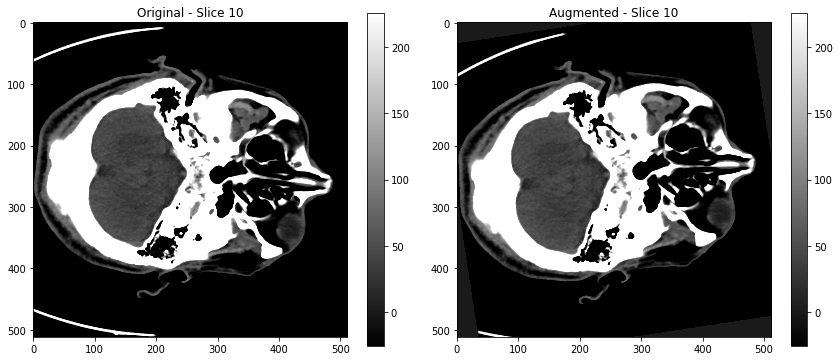

In [25]:
import nibabel as nib
import matplotlib.pyplot as plt

def show_slices_side_by_side(original_file, augmented_file, slice_number, vmin=None, vmax=None):
    # Load NIfTI files
    original_img = nib.load(original_file)
    augmented_img = nib.load(augmented_file)

    # Get image data as NumPy arrays
    original_data = original_img.get_fdata()
    augmented_data = augmented_img.get_fdata()

    # Get the specified slice from both images
    original_slice = original_data[:, :, slice_number]
    augmented_slice = augmented_data[:, :, slice_number]

    # Set up subplots for side-by-side display
    plt.figure(figsize=(12, 5))

    # Display the original slice with contrast limits
    plt.subplot(1, 2, 1)
    plt.imshow(original_slice, cmap='gray', vmin=vmin, vmax=vmax)
    plt.colorbar()  # Add a colorbar for reference
    plt.title(f"Original - Slice {slice_number}")

    # Display the augmented slice with contrast limits
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_slice, cmap='gray', vmin=vmin, vmax=vmax)
    plt.colorbar()  # Add a colorbar for reference
    plt.title(f"Augmented - Slice {slice_number}")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
original_file = 'nifti_files/images/ProxmedImg014.nii.gz'
augmented_file = 'nifti_files_augmented/images/augmented_ProxmedImg014.nii.gz'
slice_number = 10  # Replace with the desired slice number
contrast_min = -26    # Replace with your desired minimum contrast value
contrast_max = 226  # Replace with your desired maximum contrast value

# Show original and augmented slices side by side with contrast limits
show_slices_side_by_side(original_file, augmented_file, slice_number, vmin=contrast_min, vmax=contrast_max)


We can see the Difference in both the images in terms of orientation 

Now Lets Split the Data for Training, Validation and Testing  70-15-15   (Train - 10, Val - 2, Test - 2)

We Have Successfully Splitted the Data And saved it to **Final_nifti_files** Named Folder

Now Lets Find Out The Better Contrast Values For Our Training Purpose Which We are going to Use Further in Function Named **prepare**.<br>


**Check the Another .ipynb File For Further Model Development Steps**